<a href="https://colab.research.google.com/github/jieHub/ML-DL/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [41]:
# Size of dataset to be generated. The final size is 4 * data_size
data_size = 1000
num_iters = 50
num_clusters = 4

In [42]:
# sample from Gaussians 
data1 = np.random.normal((5,5,5), (4, 4, 4), (data_size,3))
data2 = np.random.normal((4,20,20), (3,3,3), (data_size, 3))
data3 = np.random.normal((25, 20, 5), (5, 5, 5), (data_size,3))
data4 = np.random.normal((40, 40, 40), (5, 5, 5), (data_size,3))

# Combine the data to create the final dataset
data = np.concatenate((data1,data2, data3, data4), axis = 0)
print(data.shape)

# Shuffle the data
np.random.shuffle(data)

# Set random seed for reproducibility 
random.seed(0)

(4000, 3)


In [43]:
# initialise centroids
centroids = data[random.sample(range(data.shape[0]), num_clusters)]

# # Create a list to store which centroid is assigned to each dataset
# assigned_centroids = np.zeros(len(data), dtype=np.int32)

def compute_l2_distance(x, centroids):
  return ((x - centroids) ** 2).sum(axis=x.ndim - 1)

def get_closest_centroid(x, centroids):
  dist = compute_l2_distance(x, centroids)
  closest_centroid_index = np.argmin(dist, axis=1)
  return closest_centroid_index

def compute_sse(data, centroids, assigned_centroids):
  sse = 0
  sse = compute_l2_distance(data, centroids[assigned_centroids]).sum() / len(data)
  return sse

In [44]:
sse_list = []
for n in range(num_iters):
  assigned_centroids = get_closest_centroid(data[:, None, :], centroids[None, :, :])
  # sse = compute_sse(data, centroids, assigned_centroids)
  # sse_list.append(sse)
  for c in range(num_clusters):
    centroids[c] = data[assigned_centroids == c].mean(axis=0)

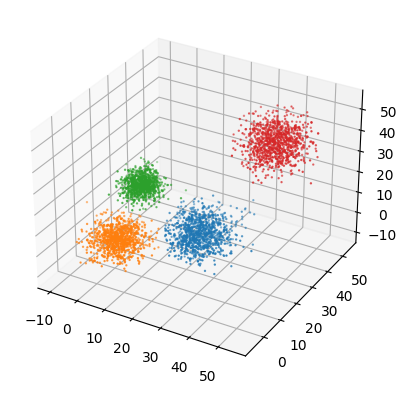

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for c in range(len(centroids)):
  cluster_members = [data[i] for i in range(len(data)) if assigned_centroids[i] == c]    
  cluster_members = np.array(cluster_members)
        
  ax.scatter(cluster_members[:,0], cluster_members[:,1], cluster_members[:,2], s= 0.5)